<h1 align='justify'><b>Correlation of state percentages of school dropout, approval, failure, and repetition with state percentages of internet access in Colombian educational institutions.<b><h1>


<p align='justify'>Education is a basic human right and the foundation on which to build peace and drive sustainable development. Education enables individuals to build more prosperous and successful lives and societies to achieve economic prosperity and social welfare [1].<p>

<p align='justify'>Access to the Internet is fundamental to achieving this vision for the future. It can improve the quality of education in many ways. It opens doorways to a wealth of information, knowledge and educational resources, increasing opportunities for learning in and beyond the classroom. Teachers use online materials to prepare lessons, and students to extend their range of learning. Interactive teaching methods, supported by the Internet, enable teachers to give more attention to individual students’ needs and support shared learning. This can help to rectify inequalities in education experienced by girls and women. Access to the Internet helps educational administrators to reduce the costs and improve the quality of schools and colleges [2].<p>

<p align='justify'>The objective of this project is to identify if there exists a correlation between state percentages of school dropout, approval, failure, and repetition in Colombian educational institutions (pre, primary and secondary education) and state percentages of educational institutions' access to internet service.<p>



---




<p align='justify'>We start by importing and installing the relevant libraries. This project will use the libraries SciPy, Pandas, Matplotlib, Numpy, Plotly, Dash (a Plotly Framework to develop interactive web applications). and Jupyter Dash a library that lets you deploy dash applications directly in a Jupyter Notebook



---



In [ ]:
# Imports libraries
from scipy import stats
import scipy
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
! pip install dash
import plotly.express as px
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
! pip install jupyter-dash
from jupyter_dash import JupyterDash

<p align='justify'>The next step is to read/import the dataset, and print its first rows to take a look at the data. This dataset is published by the Colombian government, and it contains the main indicators of preschool, basic and secondary levels, discriminated by State from the year 2011 to 2020. For more information on the dataset you can visit the link: https://www.datos.gov.co/Educaci-n/MEN_ESTADISTICAS_EN_EDUCACION_EN_PREESCOLAR-B-SICA/ji8i-4anb<p>

In [ ]:
#Imports Data

education_df = pd.read_csv('https://www.datos.gov.co/resource/ji8i-4anb.csv')

#Prints initial rows
education_df.head()

,ano,c_digo_departamento,departamento,poblacion_5_16,tasa_matriculacion_5_16,cobertura_neta,cobertura_neta_transicion,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta,cobertura_bruta_transicion,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,tamano_promedio_grupo,sedes_conectadas_a_internet,desercion,desercion_transicion,desercion_primaria,desercion_secundaria,desercion_media,aprobacion,aprobacion_transicion,aprobacion_primaria,aprobacion_secundaria,aprobacion_media,reprobacion,reprobacion_transicion,reprobacion_primaria,reprobacion_secundaria,reprobacion_media,repitencia,repitencia_transicion,repitencia_primaria,repitencia_secundaria,repitencia_media
0,2011,5,Antioquia,1288473,94.01,93.85,70.28,94.12,75.68,44.37,106.81,85.69,117.50,110.81,84.06,27.47,74.48,3.97,3.62,3.65,4.57,3.71,93.98,96.31,94.56,92.89,93.33,2.06,0.07,1.80,2.54,2.96,4.25,0.07,4.56,5.27,1.68
1,2011,8,Atlántico,523935,99.32,99.05,50.59,98.93,80.22,50.17,107.88,84.19,120.41,107.89,87.98,24.42,80.46,2.76,2.60,3.06,2.42,2.61,96.70,97.28,96.49,96.91,96.64,0.54,0.12,0.45,0.67,0.75,1.82,0.12,1.77,2.18,0.88
2,2011,11,"Bogotá, D.C.",1479334,90.70,90.29,68.63,86.99,84.70,55.01,97.78,82.04,97.94,106.48,87.76,26.75,94.21,3.95,10.05,5.30,1.96,2.55,96.05,89.95,94.69,98.04,97.45,0.00,0.00,0.00,0.00,0.00,3.23,0.00,2.30,5.11,2.57
3,2011,13,Bolívar,496676,91.57,91.40,59.74,90.81,67.34,39.17,110.41,98.82,126.45,108.15,80.64,20.80,30.12,3.14,1.85,2.93,3.79,3.13,94.76,97.68,95.48,93.46,93.20,2.10,0.46,1.59,2.75,3.67,4.43,0.46,4.44,5.37,2.28
4,2011,15,Boyacá,300501,86.16,86.11,63.36,82.50,74.65,49.09,104.15,78.87,99.88,119.78,94.76,22.77,25.26,3.07,2.40,2.24,4.03,3.51,94.20,97.43,96.10,91.66,93.23,2.73,0.17,1.66,4.31,3.26,2.62,0.17,1.90,4.19,1.55


<p align='justify'>The dataset contains observations discriminated by state and year, and a large amount of educational indicators. In order to have a better grip of the nature of the dataset, it's necessary to identify how many columns there are, what type of data stores each one of them, and the quantity of invalid data in each one of them.<p>

In [ ]:
#Shows columns, non-null count, and data types
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ano                          330 non-null    int64  
 1   c_digo_departamento          330 non-null    int64  
 2   departamento                 330 non-null    object 
 3   poblacion_5_16               330 non-null    int64  
 4   tasa_matriculacion_5_16      330 non-null    float64
 5   cobertura_neta               330 non-null    float64
 6   cobertura_neta_transicion    330 non-null    float64
 7   cobertura_neta_primaria      330 non-null    float64
 8   cobertura_neta_secundaria    330 non-null    float64
 9   cobertura_neta_media         330 non-null    float64
 10  cobertura_bruta              330 non-null    float64
 11  cobertura_bruta_transicion   330 non-null    float64
 12  cobertura_bruta_primaria     330 non-null    float64
 13  cobertura_bruta_secu

<p align='justify'>The dataset has 37 columns, and the interest variables seem to locate from column 16 to 36. All the indicator columns store elements of type float64, and only the interest variables 'sedes_conectadas_a_internet' y 'desercion_transicion' have null or invalid values.<p>

<p align='justify'>For an initial correlation analysis, it would be adequate to use undiscriminated by education level indicators, namely 'desercion'-dropout percentage (index=17), 'aprobacion'-approval percentage (index=22), 'reprobacion'-failure percentage (index=27), y 'repitencia'-repetition percentage (index=32).<p>

<p align='justify'>In order to lower the size of the dataframe, undiscriminated educational indicators along with 'ano'-year and 'c_digo_departamento'-state code will be selected.<p>

In [ ]:
#Selects relevant columns

education_resume_df = education_df.loc[:,['ano','c_digo_departamento','departamento','sedes_conectadas_a_internet','desercion','aprobacion','reprobacion','repitencia']]

Adittionally, it's necessary to manage the invalid data. 

In [ ]:
#Select rows where independent variable sedes_conectadas_a_internet is NaN

education_resume_df[np.isnan(education_resume_df['sedes_conectadas_a_internet'])]

,ano,c_digo_departamento,departamento,sedes_conectadas_a_internet,desercion,aprobacion,reprobacion,repitencia
231,2018,5,Antioquia,NaN,3.97,89.13,6.91,3.13
232,2018,8,Atlántico,NaN,1.55,93.57,4.88,0.74
233,2018,11,"Bogotá, D.C.",NaN,1.65,98.02,0.33,0.33
234,2018,13,Bolívar,NaN,2.75,90.31,6.93,3.82
235,2018,15,Boyacá,NaN,2.07,92.59,5.34,1.69
...,...,...,...,...,...,...,...,...
325,2020,91,Amazonas,NaN,2.37,88.72,8.91,10.00
326,2020,94,Guainía,NaN,3.53,81.46,15.01,10.50
327,2020,95,Guaviare,NaN,4.41,86.67,8.92,6.04
328,2020,97,Vaupés,NaN,2.54,81.18,16.28,7.15


<p align='justify'>These incomplete observations date from 2018 to 2020. Since a value of the variable 'sedes_conectadas_a_internet' can not be inferred, these observations will be discarded.

In [ ]:
#Drop rows where sedes_conectadas_a_internet is NaN
education_resume_df.dropna(subset=['sedes_conectadas_a_internet'],inplace=True)
education_resume_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ano                          231 non-null    int64  
 1   c_digo_departamento          231 non-null    int64  
 2   departamento                 231 non-null    object 
 3   sedes_conectadas_a_internet  231 non-null    float64
 4   desercion                    231 non-null    float64
 5   aprobacion                   231 non-null    float64
 6   reprobacion                  231 non-null    float64
 7   repitencia                   231 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 16.2+ KB


In order to understand the data better, descriptive statistics will be applied to the dataset

In [ ]:
#Generates descriptive statistics
education_resume_df.describe()

,ano,c_digo_departamento,sedes_conectadas_a_internet,desercion,aprobacion,reprobacion,repitencia
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,2014.000000,52.151515,34.903420,4.242338,91.461861,4.306537,2.300303
std,2.004343,30.857576,21.374901,1.856590,4.720352,3.628532,1.635868
min,2011.000000,5.000000,0.000000,0.630000,73.920000,0.000000,0.100000
25%,2012.000000,20.000000,20.255000,2.965000,89.210000,1.380000,1.210000
50%,2014.000000,52.000000,30.330000,3.970000,92.080000,3.520000,1.870000
75%,2016.000000,81.000000,42.265000,5.045000,94.985000,6.140000,2.855000
max,2017.000000,99.000000,100.000000,10.940000,99.080000,16.960000,11.730000


<p align='justify'>From the results, it can be pointed out that on average only 34.9% of the educational institutions have internet service, 4.24% of students drop out of school, 91.46% of students approve, 4.31% of students fail, and 2.30% repeat grade.<p>

<p align='justify'>In order to make a high level analysis, a visualization can be adequate. First, we identify that our dataset is a table. Regarding the type of attributes, the indicators are quantitative attributes, and 'ano' and 'sedes_conectadas_a_internet' are also quantitative attributes. The objetive of the visualization will be to identify a correlation between 'sedes_conectas_a_internet' and the educational indicators, so a scatter plot its an optimal way to achieve the objective.<p>

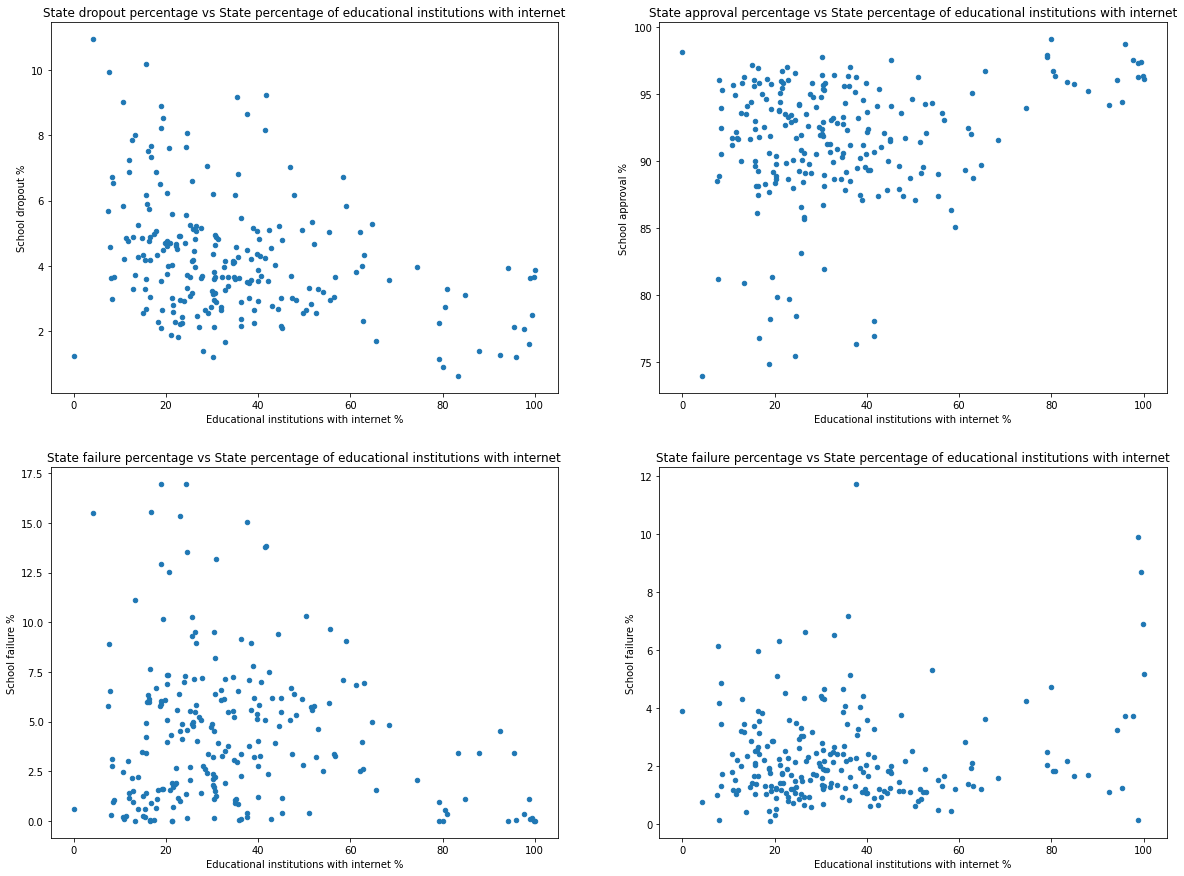

In [ ]:
fig = plt.figure(figsize=(20,15))

ax1=fig.add_subplot(2,2,1)
education_resume_df.plot(kind='scatter',x='sedes_conectadas_a_internet',y='desercion',ax=ax1)
ax1.set_title('State dropout percentage vs State percentage of educational institutions with internet')
ax1.set_xlabel('Educational institutions with internet %')
ax1.set_ylabel('School dropout %')

ax2=fig.add_subplot(2,2,2)
education_resume_df.plot(kind='scatter',x='sedes_conectadas_a_internet',y='aprobacion',ax=ax2)
ax2.set_title('State approval percentage vs State percentage of educational institutions with internet')
ax2.set_xlabel('Educational institutions with internet %')
ax2.set_ylabel('School approval %')

ax3=fig.add_subplot(2,2,3)
education_resume_df.plot(kind='scatter',x='sedes_conectadas_a_internet',y='reprobacion',ax=ax3)
ax3.set_title('State failure percentage vs State percentage of educational institutions with internet')
ax3.set_xlabel('Educational institutions with internet %')
ax3.set_ylabel('School failure %')

ax4=fig.add_subplot(2,2,4)
education_resume_df.plot(kind='scatter',x='sedes_conectadas_a_internet',y='repitencia',ax=ax4)
ax4.set_title('State failure percentage vs State percentage of educational institutions with internet')
ax4.set_xlabel('Educational institutions with internet %')
ax4.set_ylabel('School failure %')


plt.show()

<p align='justify'>The visualization shows a slight correlation between dropout and percentage of educational institutions with internet, and also a slight correlation between approval and percentage of educational institutions with internet. This is not the case for failure and repetition.<p>

<p align='justify'>Nevertheless, to measure precisely and with a probabilistic approach the level of correlation, a correlation coefficient should be calculated.<p>

<p align='justify'>To calculate the correlation coefficient through the Pearson method, the normal distribution variable assumption must be verified. For this, a q-q visualization is acceptable.<p>

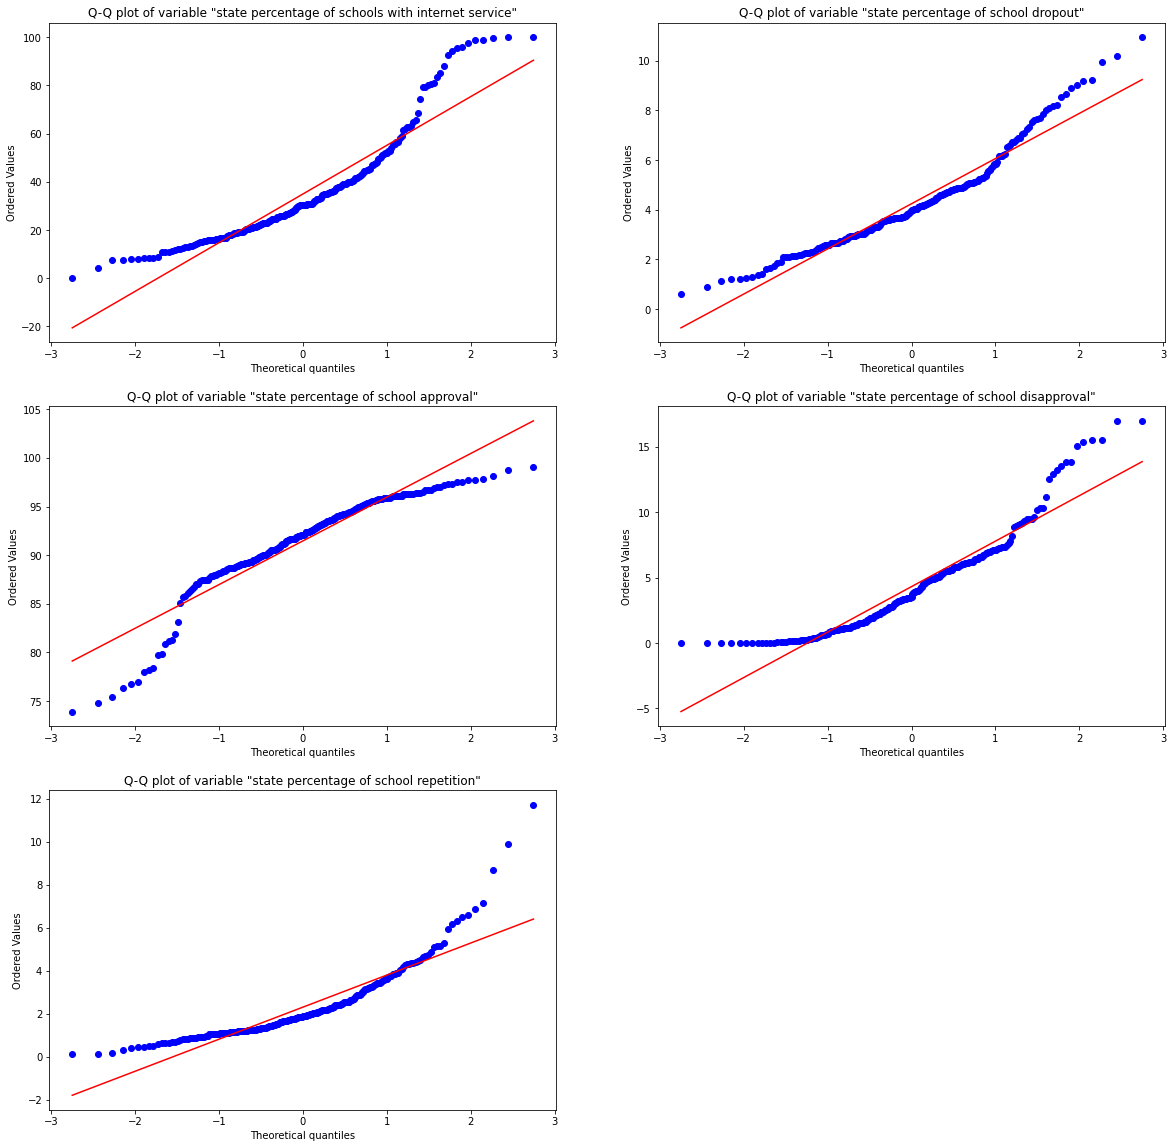

In [ ]:
#Generates QQ plot of interest variables

fig = plt.figure(figsize=(20,20)) # Mejoramos la visibilidad de la gráfica.
ax1 = fig.add_subplot(3,2,1)
stats.probplot(education_resume_df['sedes_conectadas_a_internet'], plot=ax1)
ax1.set_title('Q-Q plot of variable "state percentage of schools with internet service"')

ax2 = fig.add_subplot(3,2,2)
stats.probplot(education_resume_df['desercion'], plot= ax2)
ax2.set_title('Q-Q plot of variable "state percentage of school dropout"')


ax3 = fig.add_subplot(3,2,3)
stats.probplot(education_resume_df['aprobacion'], plot= ax3)
ax3.set_title('Q-Q plot of variable "state percentage of school approval"')

ax4 = fig.add_subplot(3,2,4)
stats.probplot(education_resume_df['reprobacion'], plot= ax4)
ax4.set_title('Q-Q plot of variable "state percentage of school disapproval"')

ax5 = fig.add_subplot(3,2,5)
stats.probplot(education_resume_df['repitencia'], plot= ax5)
ax5.set_title('Q-Q plot of variable "state percentage of school repetition"')

plt.show()

It can be pointed out from the visualization that all variables deviate from normality, but a normality test, like Shapiro-Wilk, gives a more trustworthy result.

In [ ]:
#Function prints shapiro test results
def shapiro_test_with_significance(a):
  coef, p = stats.shapiro(a)
  print(f'Estadistico W: {coef:.2f}')

  if p > 0.05:
    print(f"The sample came from a normal distribution (don't reject H0) p = {p:.3f}")
  else:
    print(f"The sample didn't came from a normal distribution (reject H0) p = {p:.3f}")

In [ ]:
#Executes Shapiro-Wilk test on interest variables

shapiro_test_with_significance(education_resume_df['sedes_conectadas_a_internet'])
shapiro_test_with_significance(education_resume_df['desercion'])
shapiro_test_with_significance(education_resume_df['aprobacion'])
shapiro_test_with_significance(education_resume_df['reprobacion'])
shapiro_test_with_significance(education_resume_df['repitencia'])

Estadistico W: 0.88
The sample didn't came from a normal distribution (reject H0) p = 0.000
Estadistico W: 0.94
The sample didn't came from a normal distribution (reject H0) p = 0.000
Estadistico W: 0.89
The sample didn't came from a normal distribution (reject H0) p = 0.000
Estadistico W: 0.90
The sample didn't came from a normal distribution (reject H0) p = 0.000
Estadistico W: 0.82
The sample didn't came from a normal distribution (reject H0) p = 0.000


From these results it can be stated that none of the interest variables come from a normal distribution, so a non-parametric method for the calculation of the correlation coefficient, like the Spearman coefficient, it's reasonable.

In [ ]:
#Function prints spearman correlation coefficient calculus results
def spearmanr_correlation_with_significance(a, b):
  coef, p = stats.spearmanr(a, b)
  print(f'Spearman correlation coefficient: {coef:.2f}')

  if p > 0.05:
    print(f"The variables are not correlated (dont' reject H0) p = {p:.3f}")
  else:
    print(f'The variables are correlated (reject H0) p = {p:.3f}')

In [ ]:
#Executes spearman correlation coefficient calculus
spearmanr_correlation_with_significance(education_resume_df['sedes_conectadas_a_internet'], education_resume_df['desercion'])
spearmanr_correlation_with_significance(education_resume_df['sedes_conectadas_a_internet'], education_resume_df['aprobacion'])
spearmanr_correlation_with_significance(education_resume_df['sedes_conectadas_a_internet'], education_resume_df['reprobacion'])
spearmanr_correlation_with_significance(education_resume_df['sedes_conectadas_a_internet'], education_resume_df['repitencia'])

Spearman correlation coefficient: -0.34
The variables are correlated (reject H0) p = 0.000
Spearman correlation coefficient: 0.13
The variables are correlated (reject H0) p = 0.045
Spearman correlation coefficient: 0.01
The variables are not correlated (dont' reject H0) p = 0.861
Spearman correlation coefficient: -0.01
The variables are not correlated (dont' reject H0) p = 0.841


<p align='justify'>From these results, it can be stated with a 99.9% of confidence that there exists a weak correlation between school dropout percentage and percentage of educational institutions with internet service, the same goes for school approval percentage and percentage of educational institutions with internet service but with a 95% of confidence.<p>

<p align='justify'>Since the level of education can be an attribute that generates variability, it's a good approach to develop the same analysis with the educational indicators discriminated by education level. For this, a Dash application is designed, in this dashboard we get the results from the Spearman correlation coefficient calculation, and scatter visualizations for the variables. However, since the variable 'desercion_transicion' has some invalid data, a new dataframe dropping invalid values from the complete dataframe will be also generated.<p>


In [ ]:
#Generates default configuration for deployment of dash applications
JupyterDash.infer_jupyter_proxy_config()

In [ ]:
JupyterDash.infer_jupyter_proxy_config()

In [ ]:
#Function returns a string with spearman correlation coefficient calculus results
def spearmanr_correlation_with_significance_B(a, b, c):
  coef, p = stats.spearmanr(a, b)
  answer = f'Spearman correlation coefficient between the percentage of educational institutions with internet and school {c} % : {coef:.2f}, '

  if p > 0.05:
    answer += f"the variables are not correlated (dont' reject H0) p= {p:.3f}"
  else:
    answer += f'the variables are correlated (reject H0) p= {p:.3f}'
  
  return answer

In [ ]:
#New dataframe from complete dataframe dropping null values in interest variables
education_resumeB_df=education_df.dropna(subset=['sedes_conectadas_a_internet','desercion_transicion'])
education_resumeB_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 230
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ano                          230 non-null    int64  
 1   c_digo_departamento          230 non-null    int64  
 2   departamento                 230 non-null    object 
 3   poblacion_5_16               230 non-null    int64  
 4   tasa_matriculacion_5_16      230 non-null    float64
 5   cobertura_neta               230 non-null    float64
 6   cobertura_neta_transicion    230 non-null    float64
 7   cobertura_neta_primaria      230 non-null    float64
 8   cobertura_neta_secundaria    230 non-null    float64
 9   cobertura_neta_media         230 non-null    float64
 10  cobertura_bruta              230 non-null    float64
 11  cobertura_bruta_transicion   230 non-null    float64
 12  cobertura_bruta_primaria     230 non-null    float64
 13  cobertura_bruta_secu

In [ ]:
#Creates a dash application
app = JupyterDash(__name__)


#Defines app layout
app.layout=html.Div(children=[
                             
                             html.Div([html.Label('Education Level'), dcc.Dropdown(id='education-level', value='primary', options=[
                                                                                                                                   {'label':'Pre-education', 'value':'pre'},
                                                                                                                                   {'label':'Primary education', 'value':'primary'},
                                                                                                                                   {'label':'Secondary education', 'value':'secondary'}
                                                                                                                                   
                                                                                                                                    ]
                                                                                   )
                                     ]),
                              
                             html.Div([
                                       html.P(id='p-dropout'),
                                       html.P(id='p-approval'),
                                       html.P(id='p-failure'),
                                       html.P(id='p-repetition')
                                       ]),
                        
                             html.Div([
                                       html.Div(dcc.Graph(id='dropout')),
                                       html.Div(dcc.Graph(id='approval'))
                                      ], style = {'display':'flex'}),

                             html.Div([
                                       html.Div(dcc.Graph(id='failure')),
                                       html.Div(dcc.Graph(id='repetition'))
                                       ], style = {'display':'flex'})
                            ])

#Callback decorator
@app.callback(
    [
     Output(component_id='dropout', component_property='figure'),
     Output(component_id='approval', component_property='figure'),
     Output(component_id='failure', component_property='figure'),
     Output(component_id='repetition', component_property='figure'),
     Output(component_id='p-dropout', component_property='children'),
     Output(component_id='p-approval', component_property='children'),
     Output(component_id='p-failure', component_property='children'),
     Output(component_id='p-repetition', component_property='children')
    ],
    Input(component_id='education-level', component_property='value')
)
def get_graphs(education_level):
  if education_level =='pre':
    dropout = px.scatter(education_resumeB_df,x='sedes_conectadas_a_internet', y='desercion_transicion', labels={'sedes_conectadas_a_internet':'Educational institutions with internet %',
                                                                                                         'desercion_transicion':'School dropout %'},
                         title='State dropout % vs State % of educational institutions with internet')
    approval = px.scatter(education_resumeB_df,x='sedes_conectadas_a_internet', y='aprobacion_transicion', labels={'sedes_conectadas_a_internet':'Educational institutions with internet %',
                                                                                                         'aprobacion_transicion':'School approval %'},
                         title='State approval % vs State % of educational institutions with internet')
    failure = px.scatter(education_resumeB_df,x='sedes_conectadas_a_internet', y='reprobacion_transicion', labels={'sedes_conectadas_a_internet':'Educational institutions with internet %',
                                                                                                         'reprobacion_transicion':'School failure %'},
                         title='State failure % vs State % of educational institutions with internet')
    repetition = px.scatter(education_resumeB_df,x='sedes_conectadas_a_internet', y='repitencia_transicion', labels={'sedes_conectadas_a_internet':'Educational institutions with internet %',
                                                                                                         'repitencia_transicion':'School repetition %'},
                         title='State repetition % vs State % of educational institutions with internet')
    dropout.update_layout(title_font_size=16)
    approval.update_layout(title_font_size=16)
    failure.update_layout(title_font_size=16)
    repetition.update_layout(title_font_size=16)

    pdropout = spearmanr_correlation_with_significance_B(education_resumeB_df['desercion_transicion'],education_resumeB_df['sedes_conectadas_a_internet'],"dropout")
    papproval = spearmanr_correlation_with_significance_B(education_resumeB_df['aprobacion_transicion'],education_resumeB_df['sedes_conectadas_a_internet'],"approval")
    pfailure = spearmanr_correlation_with_significance_B(education_resumeB_df['reprobacion_transicion'],education_resumeB_df['sedes_conectadas_a_internet'],"failure")
    prepetition = spearmanr_correlation_with_significance_B(education_resumeB_df['repitencia_transicion'],education_resumeB_df['sedes_conectadas_a_internet'],"repetition")
  elif education_level=='primary':

    dropout = px.scatter(education_resumeB_df,x='sedes_conectadas_a_internet', y='desercion_primaria', labels={'sedes_conectadas_a_internet':'Educational institutions with internet %',
                                                                                                         'desercion_primaria':'School dropout %'},
                         title='State dropout % vs State % of educational institutions with internet')
          
    approval = px.scatter(education_resumeB_df,x='sedes_conectadas_a_internet', y='aprobacion_primaria', labels={'sedes_conectadas_a_internet':'Educational institutions with internet %',
                                                                                                         'aprobacion_primaria':'School approval %'},
                         title='State approval % vs State % of educational institutions with internet')
          
    failure = px.scatter(education_resumeB_df,x='sedes_conectadas_a_internet', y='reprobacion_primaria', labels={'sedes_conectadas_a_internet':'Educational institutions with internet %',
                                                                                                         'reprobacion_primaria':'School failure %'},
                         title='State failure % vs State % of educational institutions with internet')
          
    repetition = px.scatter(education_resumeB_df,x='sedes_conectadas_a_internet', y='repitencia_primaria', labels={'sedes_conectadas_a_internet':'Educational institutions with internet %',
                                                                                                         'repitencia_primaria':'School repetition %'},
                         title='State repetition % vs State % of educational institutions with internet')
    dropout.update_layout(title_font_size=16)
    approval.update_layout(title_font_size=16)
    failure.update_layout(title_font_size=16)
    repetition.update_layout(title_font_size=16)

    pdropout = spearmanr_correlation_with_significance_B(education_resumeB_df['desercion_primaria'],education_resumeB_df['sedes_conectadas_a_internet'],"dropout")
    papproval = spearmanr_correlation_with_significance_B(education_resumeB_df['aprobacion_primaria'],education_resumeB_df['sedes_conectadas_a_internet'],"approval")
    pfailure = spearmanr_correlation_with_significance_B(education_resumeB_df['reprobacion_primaria'],education_resumeB_df['sedes_conectadas_a_internet'],"failure")
    prepetition = spearmanr_correlation_with_significance_B(education_resumeB_df['repitencia_primaria'],education_resumeB_df['sedes_conectadas_a_internet'],"repetition")
  
  else:

    dropout = px.scatter(education_resumeB_df,x='sedes_conectadas_a_internet', y='desercion_secundaria', labels={'sedes_conectadas_a_internet':'Educational institutions with internet %',
                                                                                                         'desercion_secundaria':'School dropout %'},
                         title='State dropout % vs State % of educational institutions with internet')
          
    approval = px.scatter(education_resumeB_df,x='sedes_conectadas_a_internet', y='aprobacion_secundaria', labels={'sedes_conectadas_a_internet':'Educational institutions with internet %',
                                                                                                         'aprobacion_secundaria':'School approval %'},
                         title='State approval % vs State % of educational institutions with internet')
          
    failure = px.scatter(education_resumeB_df,x='sedes_conectadas_a_internet', y='reprobacion_secundaria', labels={'sedes_conectadas_a_internet':'Educational institutions with internet %',
                                                                                                         'reprobacion_secundaria':'School failure %'},
                         title='State failure % vs State % of educational institutions with internet')
          
    repetition = px.scatter(education_resumeB_df,x='sedes_conectadas_a_internet', y='repitencia_secundaria', labels={'sedes_conectadas_a_internet':'Educational institutions with internet %',
                                                                                                         'repitencia_secundaria':'School repetition %'},
                         title='State repetition % vs State % of educational institutions with internet')
    dropout.update_layout(title_font_size=16)
    approval.update_layout(title_font_size=16)
    failure.update_layout(title_font_size=16)
    repetition.update_layout(title_font_size=16)

    pdropout = spearmanr_correlation_with_significance_B(education_resumeB_df['desercion_secundaria'],education_resumeB_df['sedes_conectadas_a_internet'],"dropout")
    papproval = spearmanr_correlation_with_significance_B(education_resumeB_df['aprobacion_secundaria'],education_resumeB_df['sedes_conectadas_a_internet'],"approval")
    pfailure = spearmanr_correlation_with_significance_B(education_resumeB_df['reprobacion_secundaria'],education_resumeB_df['sedes_conectadas_a_internet'],"failure")
    prepetition = spearmanr_correlation_with_significance_B(education_resumeB_df['repitencia_secundaria'],education_resumeB_df['sedes_conectadas_a_internet'],"repetition")
  
  return [dropout, approval, failure, repetition, pdropout, papproval, pfailure, prepetition]

if __name__ == '__main__':
  app.run_server(mode='inline',host='localhost',port='8000')

<IPython.core.display.Javascript object>

<p align='justify'>From the dashboard, it can be argued that for pre-education we get the same result as in the undiscriminated analysis, the results show a weak correlation between school dropout percentage and percentage of educational institutions with internet service, and the same goes for approval percentage. For primary and secondary the same result is obtained but with slightly but not significant changes in magnitude.<p>

<p align='justify'>Thus, through all the analysis we can conclude that there exists a weak correlation between school dropout and approval percentage, and the percentage of educational institutions with internet service. No correlation is observed for the school failure and repetition percentages.<p>


#Bibliografia

<p align='justify'>[1]"Education for Sustainable Development Goals", Unesco.de, 2017. [Online]. Available: https://www.unesco.de/sites/default/files/2018-08/unesco_education_for_sustainable_development_goals.pdf. [Accessed: 25- Sep- 2021].

<p align='justify'>[2]"Internet Access and Education: Key considerations for policy makers - Internet Society", Internet Society, 2021. [Online]. Available: https://www.internetsociety.org/resources/doc/2017/internet-access-and-education/. [Accessed: 25- Sep- 2021].